## Visualizing Correlation between Features
We can visualize correlation between feature in a variety of ways two of the most popular ones are:
* seaborn.heatmap
* yellowbricks.target.FeatureCorrelation

In [46]:
import seaborn as sns
import pandas as pd

In [47]:
data = pd.read_csv("https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/diabetes.csv")
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
389,3,100,68,23,81,31.6,0.949,28,0
643,4,90,0,0,0,28.0,0.610,31,0
618,9,112,82,24,0,28.2,1.282,50,1
611,3,174,58,22,194,32.9,0.593,36,1
407,0,101,62,0,0,21.9,0.336,25,0


In [48]:
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 1. Using Seaborn Heatmap

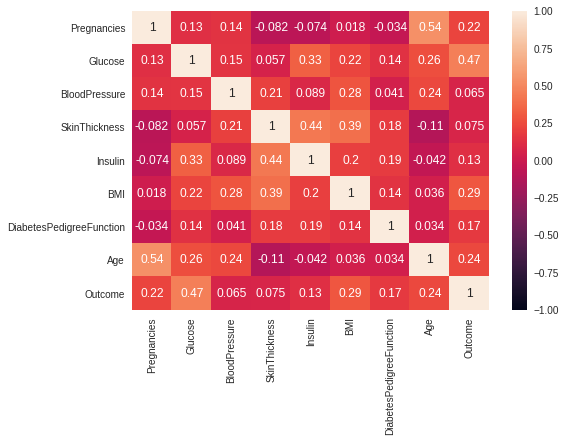

In [53]:
sns.heatmap(corr_matrix, annot=True, vmin=-1)

### 2. Using Yellowbrick.FeatureCorrelation
Here we will discuss two method of FeatureCorrelation:

1. pearson method
2. mutual_info-classification method

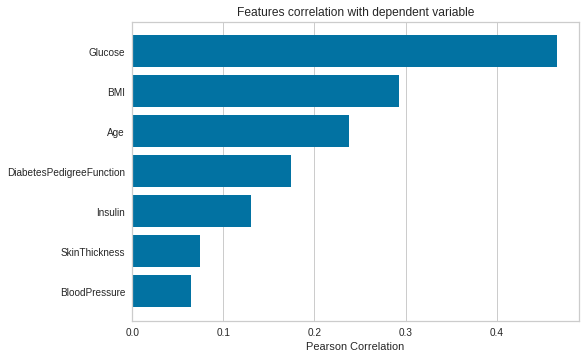

In [50]:
from yellowbrick.target import FeatureCorrelation

feature_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] # Pregnancy was not taken as it was discrete and Person correlation 

vis_pearson = FeatureCorrelation(labels=feature_list, method = 'pearson', sort=True)
vis_pearson.fit(data[feature_list], data['Outcome'])
vis_pearson.poof()

#pearson's method returns 0 if no correlation, -1 if perfect negative correlation, +1 if perfect positive correlation.

In [51]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

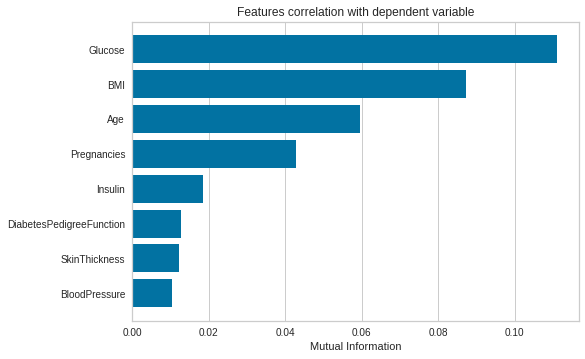

In [52]:
discrete_feat = [False for x in range(len(X.columns))]
discrete_feat[0] = True
vis_mic = FeatureCorrelation(labels=X.columns, method = 'mutual_info-classification', sort=True)
vis_mic.fit(X, y, discrete_features= discrete_feat, random_state=1)
vis_mic.poof()

# mutual_info-classification method returns 0 if no correlation and non-zero otherwise.